In [13]:
# Import
from config1 import api_key
from googleapiclient.discovery import build
import pandas as pd
import json
import requests
import datetime
import numpy as np
import seaborn as sns
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Read csv file

df = pd.read_csv("US_youtube_trending_data.csv")
df.head()


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [15]:
# Import json

import json
with open("US_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [17]:
api_category = "videoCategories"
youtube = build('youtube','v3',developerKey=api_key)

In [19]:
# Function to get video category statistics
def get_video_categories():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'  # Change this to your desired region
    )
    response = request.execute()
    
    # Print the video category information
    for category in response.get('items', []):
        print(f"Category ID: {category['id']}, Title: {category['snippet']['title']}")

# Call the function to get video categories
get_video_categories()

Category ID: 1, Title: Film & Animation
Category ID: 2, Title: Autos & Vehicles
Category ID: 10, Title: Music
Category ID: 15, Title: Pets & Animals
Category ID: 17, Title: Sports
Category ID: 18, Title: Short Movies
Category ID: 19, Title: Travel & Events
Category ID: 20, Title: Gaming
Category ID: 21, Title: Videoblogging
Category ID: 22, Title: People & Blogs
Category ID: 23, Title: Comedy
Category ID: 24, Title: Entertainment
Category ID: 25, Title: News & Politics
Category ID: 26, Title: Howto & Style
Category ID: 27, Title: Education
Category ID: 28, Title: Science & Technology
Category ID: 29, Title: Nonprofits & Activism
Category ID: 30, Title: Movies
Category ID: 31, Title: Anime/Animation
Category ID: 32, Title: Action/Adventure
Category ID: 33, Title: Classics
Category ID: 34, Title: Comedy
Category ID: 35, Title: Documentary
Category ID: 36, Title: Drama
Category ID: 37, Title: Family
Category ID: 38, Title: Foreign
Category ID: 39, Title: Horror
Category ID: 40, Title: Sci

In [21]:
# Initialize lists and dictionaries
category_number = []
categories = []
category_index = {}

# Populate category_number and categories lists
for item in response["items"]:
    category_number.append(item["id"])
    categories.append(item["snippet"]["title"])

# Create category_index dictionary with all categories
category_index = dict(zip(category_number, categories))

# List of categories to exclude
excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}

# Remove excluded categories from category_index
category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}

# Display remaining categories
print("Remaining categories:")
for key, value in category_index.items():
    print(f"ID: {key}, Title: {value}")

NameError: name 'response' is not defined

In [23]:
# Get video categories
def get_video_categories(region_code="US"):
    request = youtube.videoCategories().list(
        part="snippet",
        regionCode=region_code
    )
    response = request.execute()
    return response["items"]

# Fetch video statistics by category
def fetch_category_statistics(category_id):
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        videoCategoryId=category_id,
        maxResults=10 
    )
    response = request.execute()
    statistics = []
    for item in response['items']:
        stats = {
            'videoId': item['id'],
            'views': int(item['statistics'].get('viewCount', 0)),
            'likes': int(item['statistics'].get('likeCount', 0)),
            'comments': int(item['statistics'].get('commentCount', 0)),
        }
        statistics.append(stats)
    return statistics

# Sort statistics 
def sort_statistics(statistics, key):
    return sorted(statistics, key=lambda x: x[key], reverse=True)

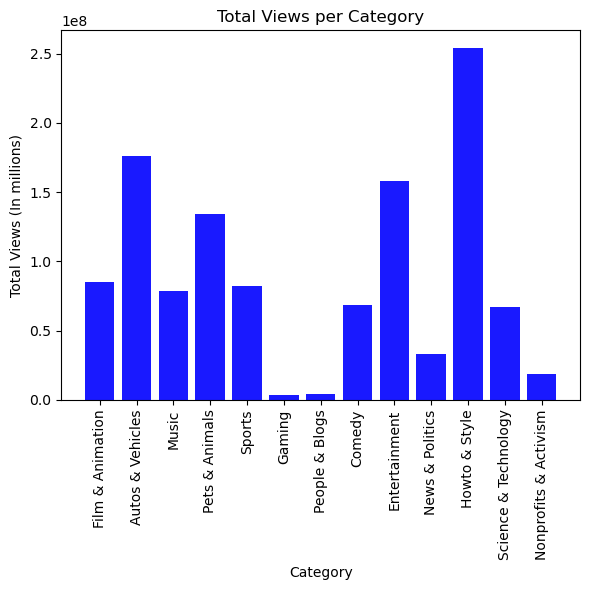

In [25]:
# Function to fetch statistics and plot histograms
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for plotting
    total_views_per_category = []
    category_names = []
    
    # Collect total views for each category
    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Sum all views in the category
        total_views = sum(stat['views'] for stat in stats)
        
        total_views_per_category.append(total_views)
        category_names.append(category_name)
    
    # Plot histogram for Total Views per Category
    plt.figure(figsize=(6, 6))
    plt.bar(category_names, total_views_per_category, color='blue', alpha=0.9)
    plt.title('Total Views per Category')
    plt.xlabel('Category')
    plt.ylabel('Total Views (In millions)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

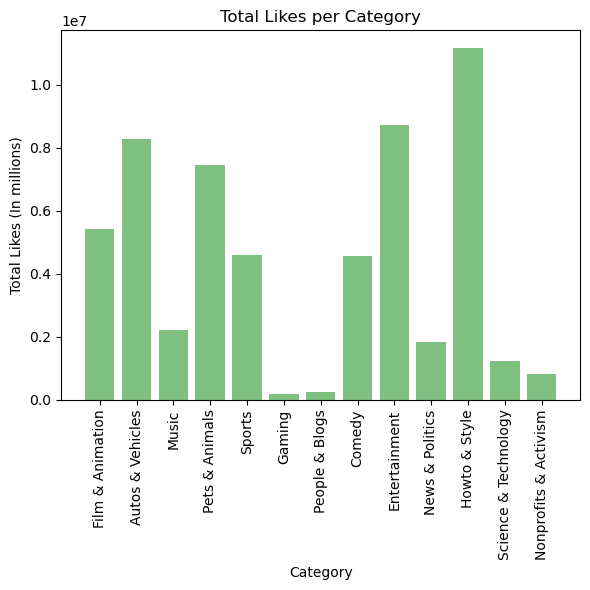

In [27]:
# Main function to fetch statistics, sum likes and plot histogram
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for plotting
    category_likes_sum = {}
    
    # Collect likes sums for each category
    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Sum likes for this category
        total_likes = sum(stat['likes'] for stat in stats)
        category_likes_sum[category_name] = total_likes
    
    # Plot histogram for summed likes
    plt.figure(figsize=(6, 6))
    plt.bar(category_likes_sum.keys(), category_likes_sum.values(), color='green', alpha=0.5)
    plt.title('Total Likes per Category')
    plt.xlabel('Category')
    plt.ylabel('Total Likes (In millions)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

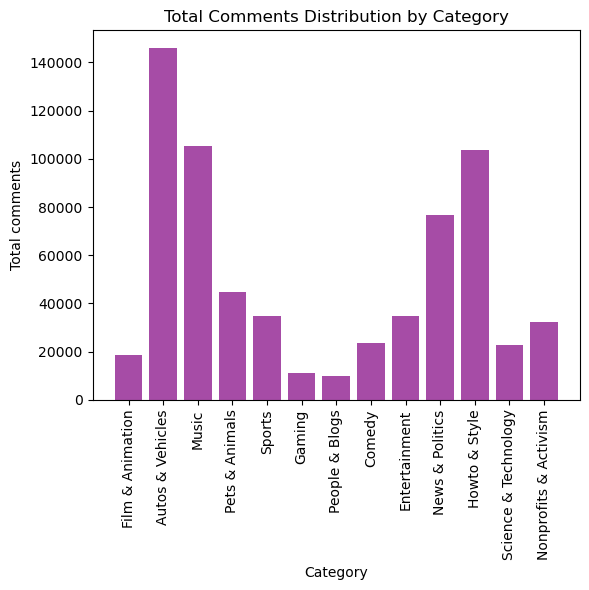

In [29]:
# Main function to fetch and plot comment statistics
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for plotting
    total_comments_per_category = []
    category_names = []
    
    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Sum likes for this category
        total_comments = sum(stat['comments'] for stat in stats)
        total_comments_per_category.append(total_comments)
        category_names.append(category_name)
    
    # Plot histogram for total comments
    plt.figure(figsize=(6, 6))
    plt.bar(category_names, total_comments_per_category, color='purple', alpha=0.7)
    plt.title('Total Comments Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Total comments')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

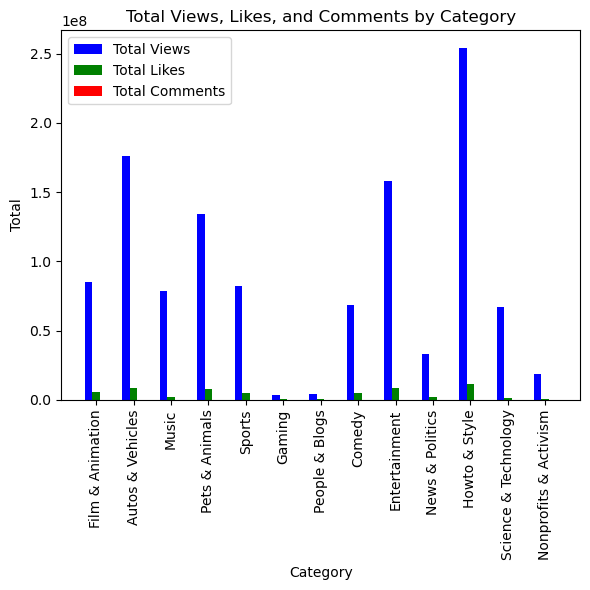

In [34]:
# Main function to fetch, aggregate, and plot statistics
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for plotting
    categories_summary = {
        "Category": [],
        "Total Views": [],
        "Total Likes": [],
        "Total Comments": []
    }
    
    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Aggregate totals
        total_views = sum(stat['views'] for stat in stats)
        total_likes = sum(stat['likes'] for stat in stats)
        total_comments = sum(stat['comments'] for stat in stats)
        
        # Store data
        categories_summary["Category"].append(category_name)
        categories_summary["Total Views"].append(total_views)
        categories_summary["Total Likes"].append(total_likes)
        categories_summary["Total Comments"].append(total_comments)
    
    # Plot bar chart
    x = range(len(categories_summary["Category"]))
    
    plt.figure(figsize=(6, 6))

    plt.bar(x, categories_summary["Total Views"], width=0.2, label='Total Views', color='blue', align='center')
    plt.bar([p + 0.2 for p in x], categories_summary["Total Likes"], width=0.2, label='Total Likes', color='green', align='center')
    plt.bar([p + 0.4 for p in x], categories_summary["Total Comments"], width=0.2, label='Total Comments', color='red', align='center')

    plt.xlabel('Category')
    plt.ylabel('Total')
    plt.title('Total Views, Likes, and Comments by Category')
    plt.xticks([p + 0.2 for p in x], categories_summary["Category"], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

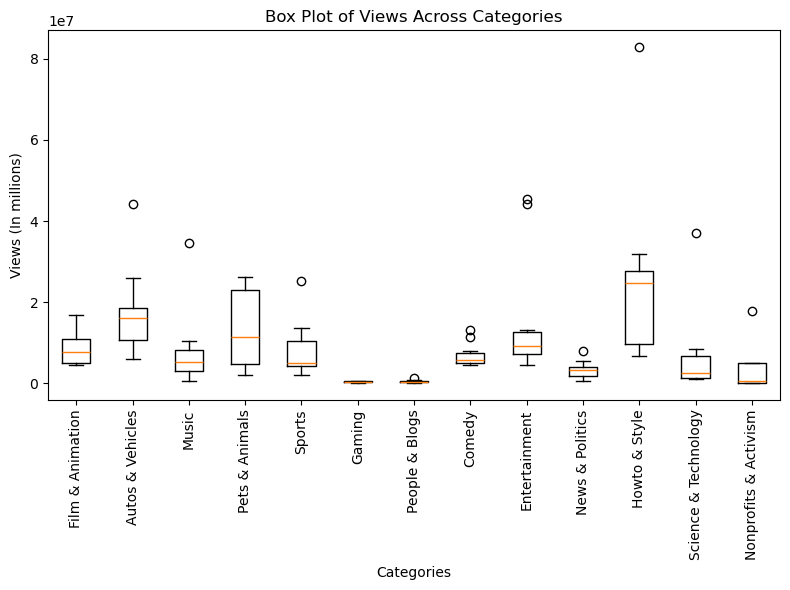

In [36]:
# Main function to fetch, aggregate, and plot box plots
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for box plots
    category_views = {}

    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Collect views data
        views = [stat['views'] for stat in stats]
        
        # Store views data by category
        category_views[category_name] = views
    
    # Prepare data for box plot
    data_to_plot = [category_views[cat] for cat in category_index.values()]
    labels = list(category_index.values())
    
    # Plot box plots
    plt.figure(figsize=(8, 6))

    plt.boxplot(data_to_plot, labels=labels)

    plt.title('Box Plot of Views Across Categories')
    plt.xlabel('Categories')
    plt.ylabel('Views (In millions)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

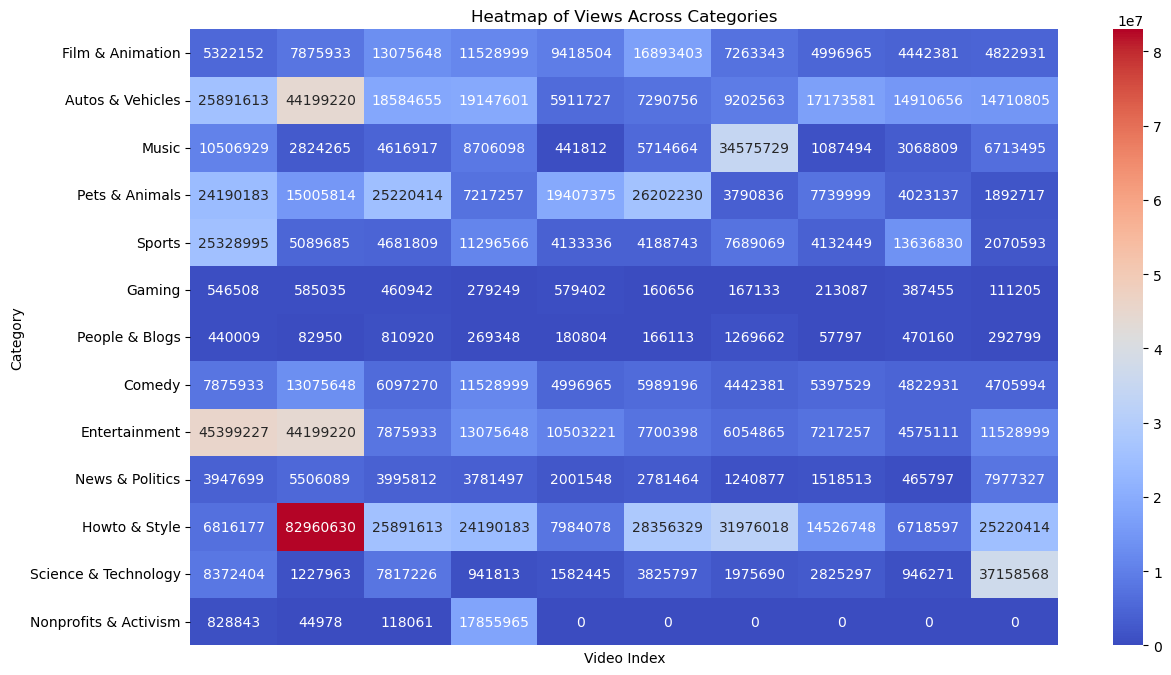

In [56]:
# Function to fetch video statistics by category
def fetch_category_statistics(category_id):
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        videoCategoryId=category_id,
        maxResults=10  
    )
    response = request.execute()
    views = [int(item['statistics'].get('viewCount', 0)) for item in response['items']]
    return views

# Main function to fetch, aggregate, and plot a heatmap
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for the heatmap
    views_data = []

    max_videos = 0

    for category_id, category_name in category_index.items():
        views = fetch_category_statistics(category_id)
        views_data.append(views)
        max_videos = max(max_videos, len(views))

    # Pad lists with zeros to make them the same length
    for i in range(len(views_data)):
        views_data[i] += [0] * (max_videos - len(views_data[i]))

    # Convert views_data to a numpy array
    views_array = np.array(views_data)
    
    # Create a heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(views_array, annot=True, fmt='d', cmap='coolwarm', xticklabels=False, yticklabels=list(category_index.values()))

    plt.title('Heatmap of Views Across Categories')
    plt.xlabel('Video Index')
    plt.ylabel('Category')
    plt.show()

if __name__ == "__main__":
    main()

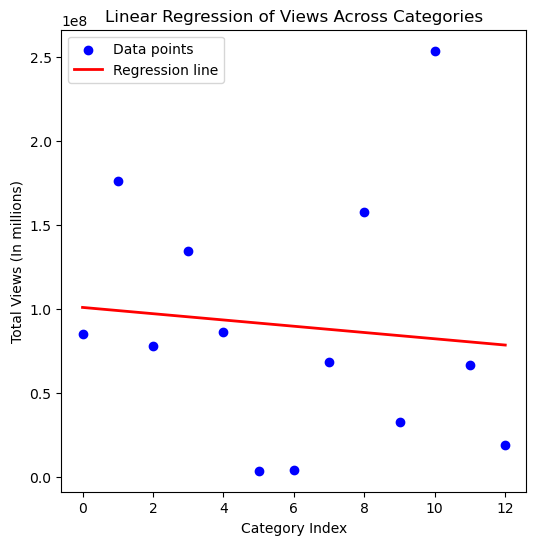

In [328]:
# Main function to fetch, prepare data, and perform linear regression
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for linear regression
    x = []
    y = []
    
    for idx, (category_id, category_name) in enumerate(category_index.items()):
        stats = fetch_category_statistics(category_id)
        
        # Aggregate views
        total_views = sum(stat['views'] for stat in stats)
        
        # Append data (convert category index to numerical values)
        x.append(idx)
        y.append(total_views)
    
    # Convert lists to numpy arrays
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Predict values
    y_pred = model.predict(x)
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
    
    plt.title('Linear Regression of Views Across Categories')
    plt.xlabel('Category Index')
    plt.ylabel('Total Views (In millions)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

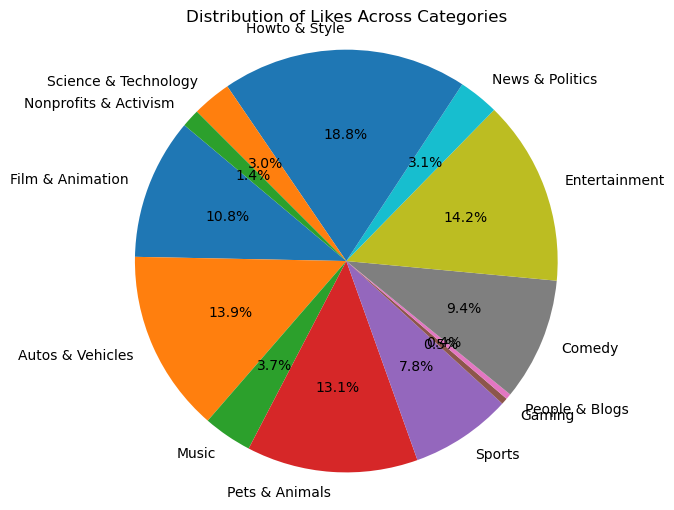

In [288]:
# Main function to fetch, aggregate, and plot pie chart
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for pie chart
    category_likes = {}
    
    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Aggregate likes data
        total_likes = sum(stat['likes'] for stat in stats)
        category_likes[category_name] = total_likes
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(category_likes.values(), labels=category_likes.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Likes Across Categories')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

if __name__ == "__main__":
    main()

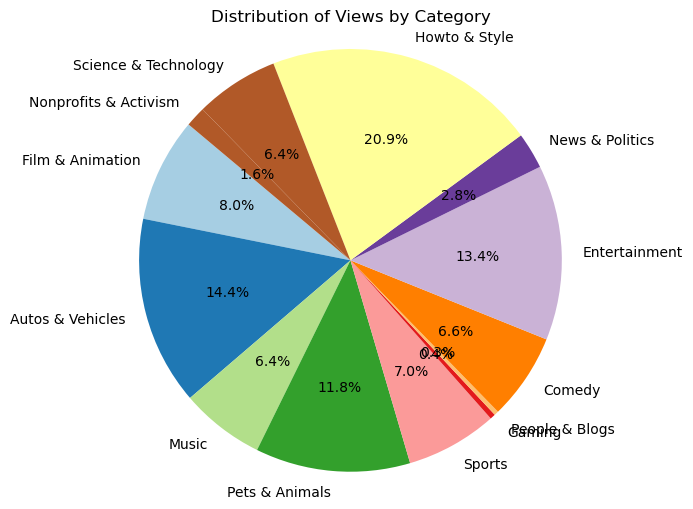

In [294]:
# Main function to fetch, aggregate, and plot pie chart
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Prepare data for pie chart
    category_views = {}

    for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Aggregate total views for the category
        total_views = sum(stat['views'] for stat in stats)
        
        # Store data
        category_views[category_name] = total_views
    
    # Prepare data for plotting
    labels = list(category_views.keys())
    sizes = list(category_views.values())
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
    plt.title('Distribution of Views by Category')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

if __name__ == "__main__":
    main()

In [23]:
# Fetch and display statistics for remaining categories
def main():
    # Get categories from the YouTube API
    categories_response = get_video_categories()
    
    # Extract category ID and title
    category_number = [item["id"] for item in categories_response]
    categories = [item["snippet"]["title"] for item in categories_response]
    
    # Create category_index dictionary with all categories
    category_index = dict(zip(category_number, categories))
    
    # List of categories to exclude
    excluded_categories = {"18", "19", "21", "27", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44"}
    
    # Filter out excluded categories
    category_index = {key: value for key, value in category_index.items() if key not in excluded_categories}
    
    # Fetch and display statistics
    for category_id, category_name in category_index.items():
        print(f"\nCategory: {category_name}")
        stats = fetch_category_statistics(category_id)
        
        # Display statistics without sorting
        for stat in stats:
            print(f"Video ID: {stat['videoId']}, Views: {stat['views']}, Likes: {stat['likes']}, Comments: {stat['comments']}")

if __name__ == "__main__":
    main()



Category: Film & Animation
Video ID: -qbbCoH5aTw, Views: 4722773, Likes: 325721, Comments: 2532
Video ID: 5L1j9pgKWzc, Views: 7709752, Likes: 426763, Comments: 1264
Video ID: RtvsmNw7fMM, Views: 11031054, Likes: 836830, Comments: 865
Video ID: 0EiztiynDEU, Views: 9004883, Likes: 0, Comments: 6613
Video ID: eubDjjoA48g, Views: 7005751, Likes: 561828, Comments: 1828
Video ID: PXBLuSHwu_A, Views: 15989626, Likes: 1092499, Comments: 1240
Video ID: oeDnijqH5cU, Views: 4292082, Likes: 320376, Comments: 381
Video ID: 5K1QuRRBiZQ, Views: 16260925, Likes: 1342521, Comments: 4125
Video ID: OScPdtz_CeE, Views: 4544114, Likes: 323622, Comments: 648
Video ID: 4MS6db9LMiY, Views: 4591040, Likes: 331663, Comments: 763

Category: Autos & Vehicles
Video ID: wmnJGd_gqNQ, Views: 25157758, Likes: 1246669, Comments: 17734
Video ID: Ia_Qwke1gEc, Views: 44104326, Likes: 1859111, Comments: 6551
Video ID: xbzpx_XL_V0, Views: 18270144, Likes: 1343056, Comments: 17091
Video ID: 1n7fsd-G0co, Views: 7206725, Like

In [25]:
for category_id, category_name in category_index.items():
        stats = fetch_category_statistics(category_id)
        
        # Collect likes data
        likes_data = [stat['likes'] for stat in stats]
        
        # Plot histogram for Likes
        plt.figure(figsize=(8, 6))
        plt.hist(likes_data, bins=10, color='green', alpha=0.7)
        plt.title(f"Likes Distribution for {category_name}")
        plt.xlabel('Likes')
        plt.ylabel('Frequency')
        plt.show()

if __name__ == "__main__":
    main()


Category: Film & Animation
Video ID: -qbbCoH5aTw, Views: 4722773, Likes: 325742, Comments: 2532
Video ID: 5L1j9pgKWzc, Views: 7709752, Likes: 426766, Comments: 1264
Video ID: RtvsmNw7fMM, Views: 11031054, Likes: 836846, Comments: 865
Video ID: 0EiztiynDEU, Views: 9004883, Likes: 0, Comments: 6613
Video ID: eubDjjoA48g, Views: 7005751, Likes: 561841, Comments: 1828
Video ID: PXBLuSHwu_A, Views: 15989626, Likes: 1092499, Comments: 1240
Video ID: oeDnijqH5cU, Views: 4292082, Likes: 320376, Comments: 381
Video ID: 5K1QuRRBiZQ, Views: 16260925, Likes: 1342521, Comments: 4125
Video ID: OScPdtz_CeE, Views: 4544114, Likes: 323653, Comments: 648
Video ID: 4MS6db9LMiY, Views: 4591040, Likes: 331669, Comments: 763

Category: Autos & Vehicles
Video ID: wmnJGd_gqNQ, Views: 25157758, Likes: 1246693, Comments: 17734
Video ID: Ia_Qwke1gEc, Views: 44104326, Likes: 1859114, Comments: 6551
Video ID: xbzpx_XL_V0, Views: 18270144, Likes: 1343067, Comments: 17091
Video ID: 1n7fsd-G0co, Views: 7206725, Like